## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Importing the dataset

The dataset is stored in Jupyter notebook itself, hence we use './' before the name of the dataset to import it.

In [2]:
iris=pd.read_csv('./iris_data.data')
iris

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


We rename the columns of the dataset.

In [3]:
iris.columns= ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']
iris

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


Now we assign the different classes to numerical labels for ease of use later, and store these new numerical labels in the variable classes.

In [4]:
iris.Class, classes = pd.factorize(iris.Class)
print(classes)

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')


Iris-setosa is 0, Iris-versicolor is 1, Iris-virginica is 2

In [5]:
iris

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


We separate the dataframe into the data and target variables.

In [6]:
x=iris.iloc[:, :-1].to_numpy()
x

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3

In [7]:
y=iris.iloc[:, -1].to_numpy()
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

## Splitting the datatset

We split the dataset into training and validation sets (instead of the test set, here).

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state=1)

In [9]:
y_train
print(y_train)

[0 1 0 0 2 2 2 2 1 2 2 1 0 2 1 0 0 1 2 2 0 2 2 1 1 1 2 0 1 1 2 1 2 2 0 0 0
 2 0 1 2 2 0 0 1 0 2 2 2 2 1 2 2 1 0 1 0 1 1 0 1 0 0 2 2 2 1 0 1 0 2 0 2 2
 0 2 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 2 0 0 2 1 2 1 2 2 1 2 0]


In [10]:
y_val 
print(y_val)

[2 1 1 1 1 2 1 1 0 1 0 0 1 0 1 0 1 0 1 0 2 2 0 2 2 0 1 0 1 2 2 1 0 2 0 0 2
 2 0 2 2 1 1 0 0]


## Implementing the elbow method

We implement the elbow methods to find the optimal number of clusters to train our model with. Error is basically within cluster sum of squares (WCSS). 
The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. 

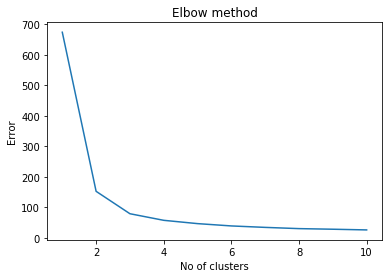

In [11]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

# The optimum clusters is where the elbow occurs. 

The optimal number of clusters is 3, as seen above.

## Implement k-means clustering at k=3

We implement k-means clustering, and fit the training data into the model. Then we get the predicted labels. But the labels are randomized and since it is an unsupervised algorithm, we cannot pass it labels to learn. Because of this, we reassign or map the labels again.

In [12]:
km3 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
labels=km3.fit(x_train)
predictions = np.choose(labels.labels_.astype(int), [1, 0, 2]).astype(np.int64)
print(predictions)

[0 1 0 0 2 2 1 1 1 1 2 1 0 2 1 0 0 1 1 2 0 1 2 1 1 1 2 0 1 1 1 1 2 1 0 0 0
 2 0 1 2 1 0 0 1 0 2 2 2 1 1 2 2 1 0 1 0 1 1 0 2 0 0 2 2 2 1 0 1 0 1 0 2 2
 0 2 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 2 0 0 2 1 2 1 2 1 1 2 0]


In [13]:
y_km3=predictions
print(y_km3)
print(y_train)

[0 1 0 0 2 2 1 1 1 1 2 1 0 2 1 0 0 1 1 2 0 1 2 1 1 1 2 0 1 1 1 1 2 1 0 0 0
 2 0 1 2 1 0 0 1 0 2 2 2 1 1 2 2 1 0 1 0 1 1 0 2 0 0 2 2 2 1 0 1 0 1 0 2 2
 0 2 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 2 0 0 2 1 2 1 2 1 1 2 0]
[0 1 0 0 2 2 2 2 1 2 2 1 0 2 1 0 0 1 2 2 0 2 2 1 1 1 2 0 1 1 2 1 2 2 0 0 0
 2 0 1 2 2 0 0 1 0 2 2 2 2 1 2 2 1 0 1 0 1 1 0 1 0 0 2 2 2 1 0 1 0 2 0 2 2
 0 2 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 2 0 0 2 1 2 1 2 2 1 2 0]


## Visualizing the clusters


We locate the centroids of the clusters and store it in a dataframe. Then we create a scatterplot showing the optimal number of clusters as well as the centroids.

In [14]:
centroids=km3.cluster_centers_
centroids

array([[5.92954545, 2.74318182, 4.38636364, 1.425     ],
       [4.96363636, 3.3969697 , 1.44545455, 0.23030303],
       [6.84814815, 3.09259259, 5.75555556, 2.08148148]])

In [15]:
centroidsdf=pd.DataFrame(centroids)
centroidsdf.columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
centroidsdf

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.929545,2.743182,4.386364,1.425000
1,4.963636,3.396970,1.445455,0.230303
2,6.848148,3.092593,5.755556,2.081481


Text(0, 0.5, 'Sepal width')

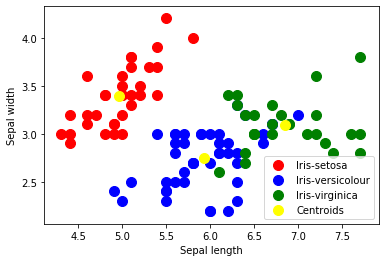

In [16]:
plt.scatter(x_train[y_km3 == 0, 0], x_train[y_km3 == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x_train[y_km3 == 1, 0], x_train[y_km3 == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x_train[y_km3 == 2, 0], x_train[y_km3 == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(km3.cluster_centers_[:, 0], km3.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

## Training and validation accuracy 

We can caluclate the accuracy of the training and validation sets. To calculate accuracy for the validation set, we need to predict using the validation data and reassign the predicted labels.

In [18]:
acc = accuracy_score(y_km3, y_train)
print("Accuracy of the Data:", acc*100)

Accuracy of the Data: 88.46153846153845


In [19]:
label2=km3.predict(x_val)
predictions2 = np.choose(label2.astype(int), [1, 0, 2]).astype(np.int64)
y_pred=predictions2
print("Accuracy on the Validation Set:", accuracy_score(y_pred, y_val)*100)

Accuracy on the Validation Set: 91.11111111111111
